In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Import World Happiness Data by setting path
path = 'C:\\Users\\samco\\OneDrive\\Achievement 6 Career Foundry\\world-happiness\\2019.csv'

In [15]:
df = pd.read_csv(path)

In [19]:
# Checking that correct file imported
df.shape

(156, 10)

In [21]:
df.head()

,Overall Rank,Country,Region,Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,107,Albania,Central and Eastern Europe,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,88,Algeria,Middle East,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,47,Argentina,Latin America,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,116,Armenia,Central and Eastern Europe,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [23]:
print(df.columns)

Index(['Overall Rank', 'Country', 'Region', 'Score', 'GDP Per Capita',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')


In [27]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Overall Rank      Country                      Region  Score  \
0           154  Afghanistan               Southern Asia  3.203   
1           107      Albania  Central and Eastern Europe  4.719   
2            88      Algeria                 Middle East  5.211   
3            47    Argentina               Latin America  6.086   
4           116      Armenia  Central and Eastern Europe  4.559   

   GDP Per Capita  Social Support  Healthy Life Expectancy  \
0           0.350           0.517                    0.361   
1           0.947           0.848                    0.874   
2           1.002           1.160                    0.785   
3           1.092           1.432                    0.881   
4           0.850           1.055                    0.815   

   Freedom to Make Life Choices  Generosity  Perceptions of Corruption  
0                         0.000       0.158                      0.025  
1                         0.383       0.178      

In [29]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
       Overall Rank       Score  GDP Per Capita  Social Support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy Life Expectancy  Freedom to Make Life Choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.00

## Create correlation matrix heat map to understand relationships between different variables


In [31]:
# Select only numeric columns for correlation analysis using questions defined in previous task to inform analysis
numeric_columns = df.select_dtypes(include=[np.number])

In [33]:
# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

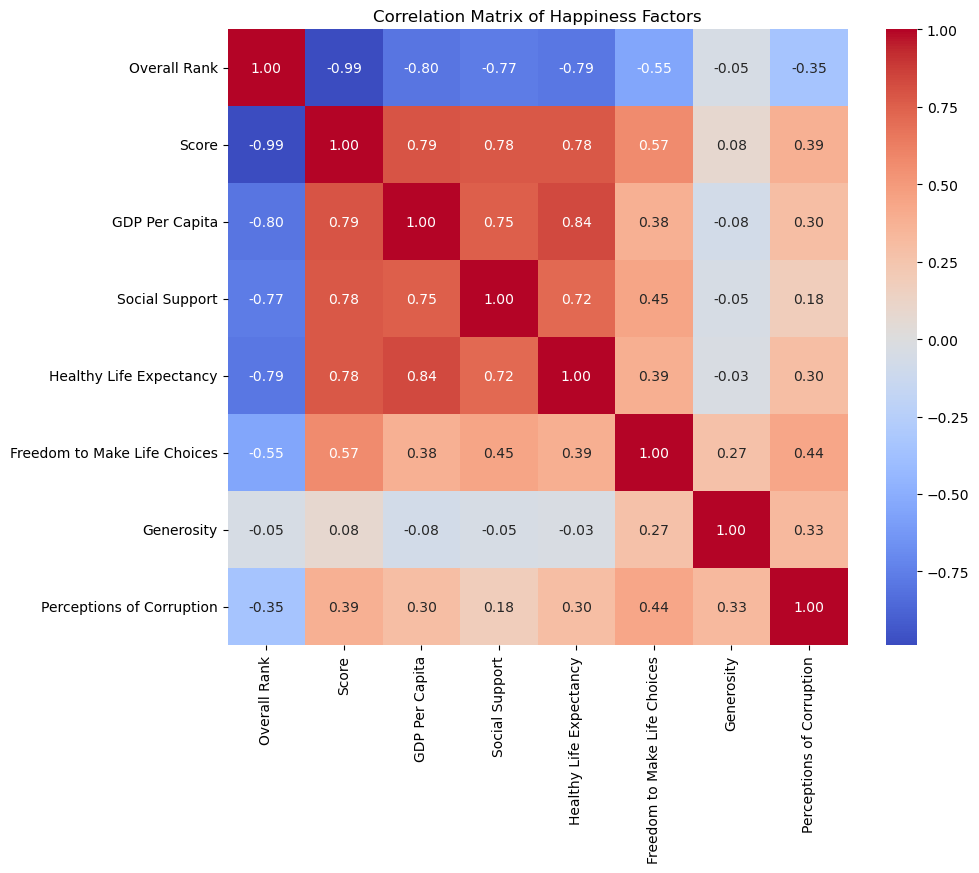

In [35]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

## A correlation coeffficient of 0 means no relationship; 0.1–0.3 indicates a weak relationship; 0.3–0.5 indicates a moderate relationship; and 0.5–1.0 indicates a strong relationship. Based on the heatmap above, happiness scores appear to have a strong (0.79 and 0.78) correlation to GDP Per Capita, Social Support, and Healthy Life Expectancy, respectively. Generosity has a weak correlation with happiness scores at 0.08.

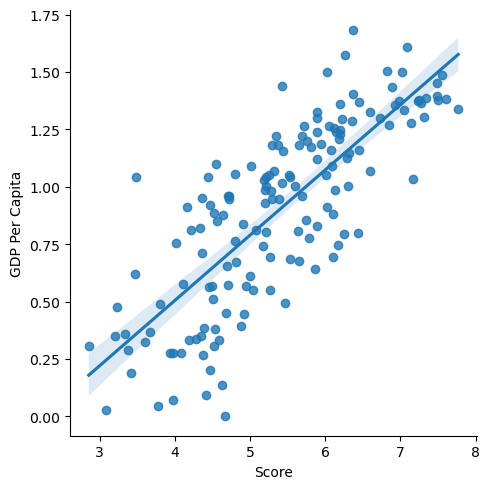

In [37]:
# Create a scatterplot for Score and GDP Per Capita columns in seaborn
sns.lmplot(x = 'Score', y = 'GDP Per Capita', data = df)

## The scatterplot shows a strong positive linear relationship between happiness scores and GDP per capita. 

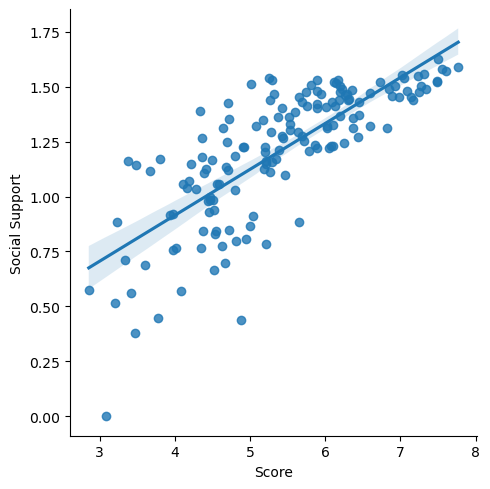

In [39]:
# Create a scatterplot for Score and Social Support columns in seaborn
sns.lmplot(x = 'Score', y = 'Social Support', data = df)

## While generally showing a positive trend, there is a less clear relationship between social support and happiness scores and a couple of outliers.

In [41]:
# Keep only the variables you want to use in the pair plot
numeric_columns = df.select_dtypes(include=[np.number])

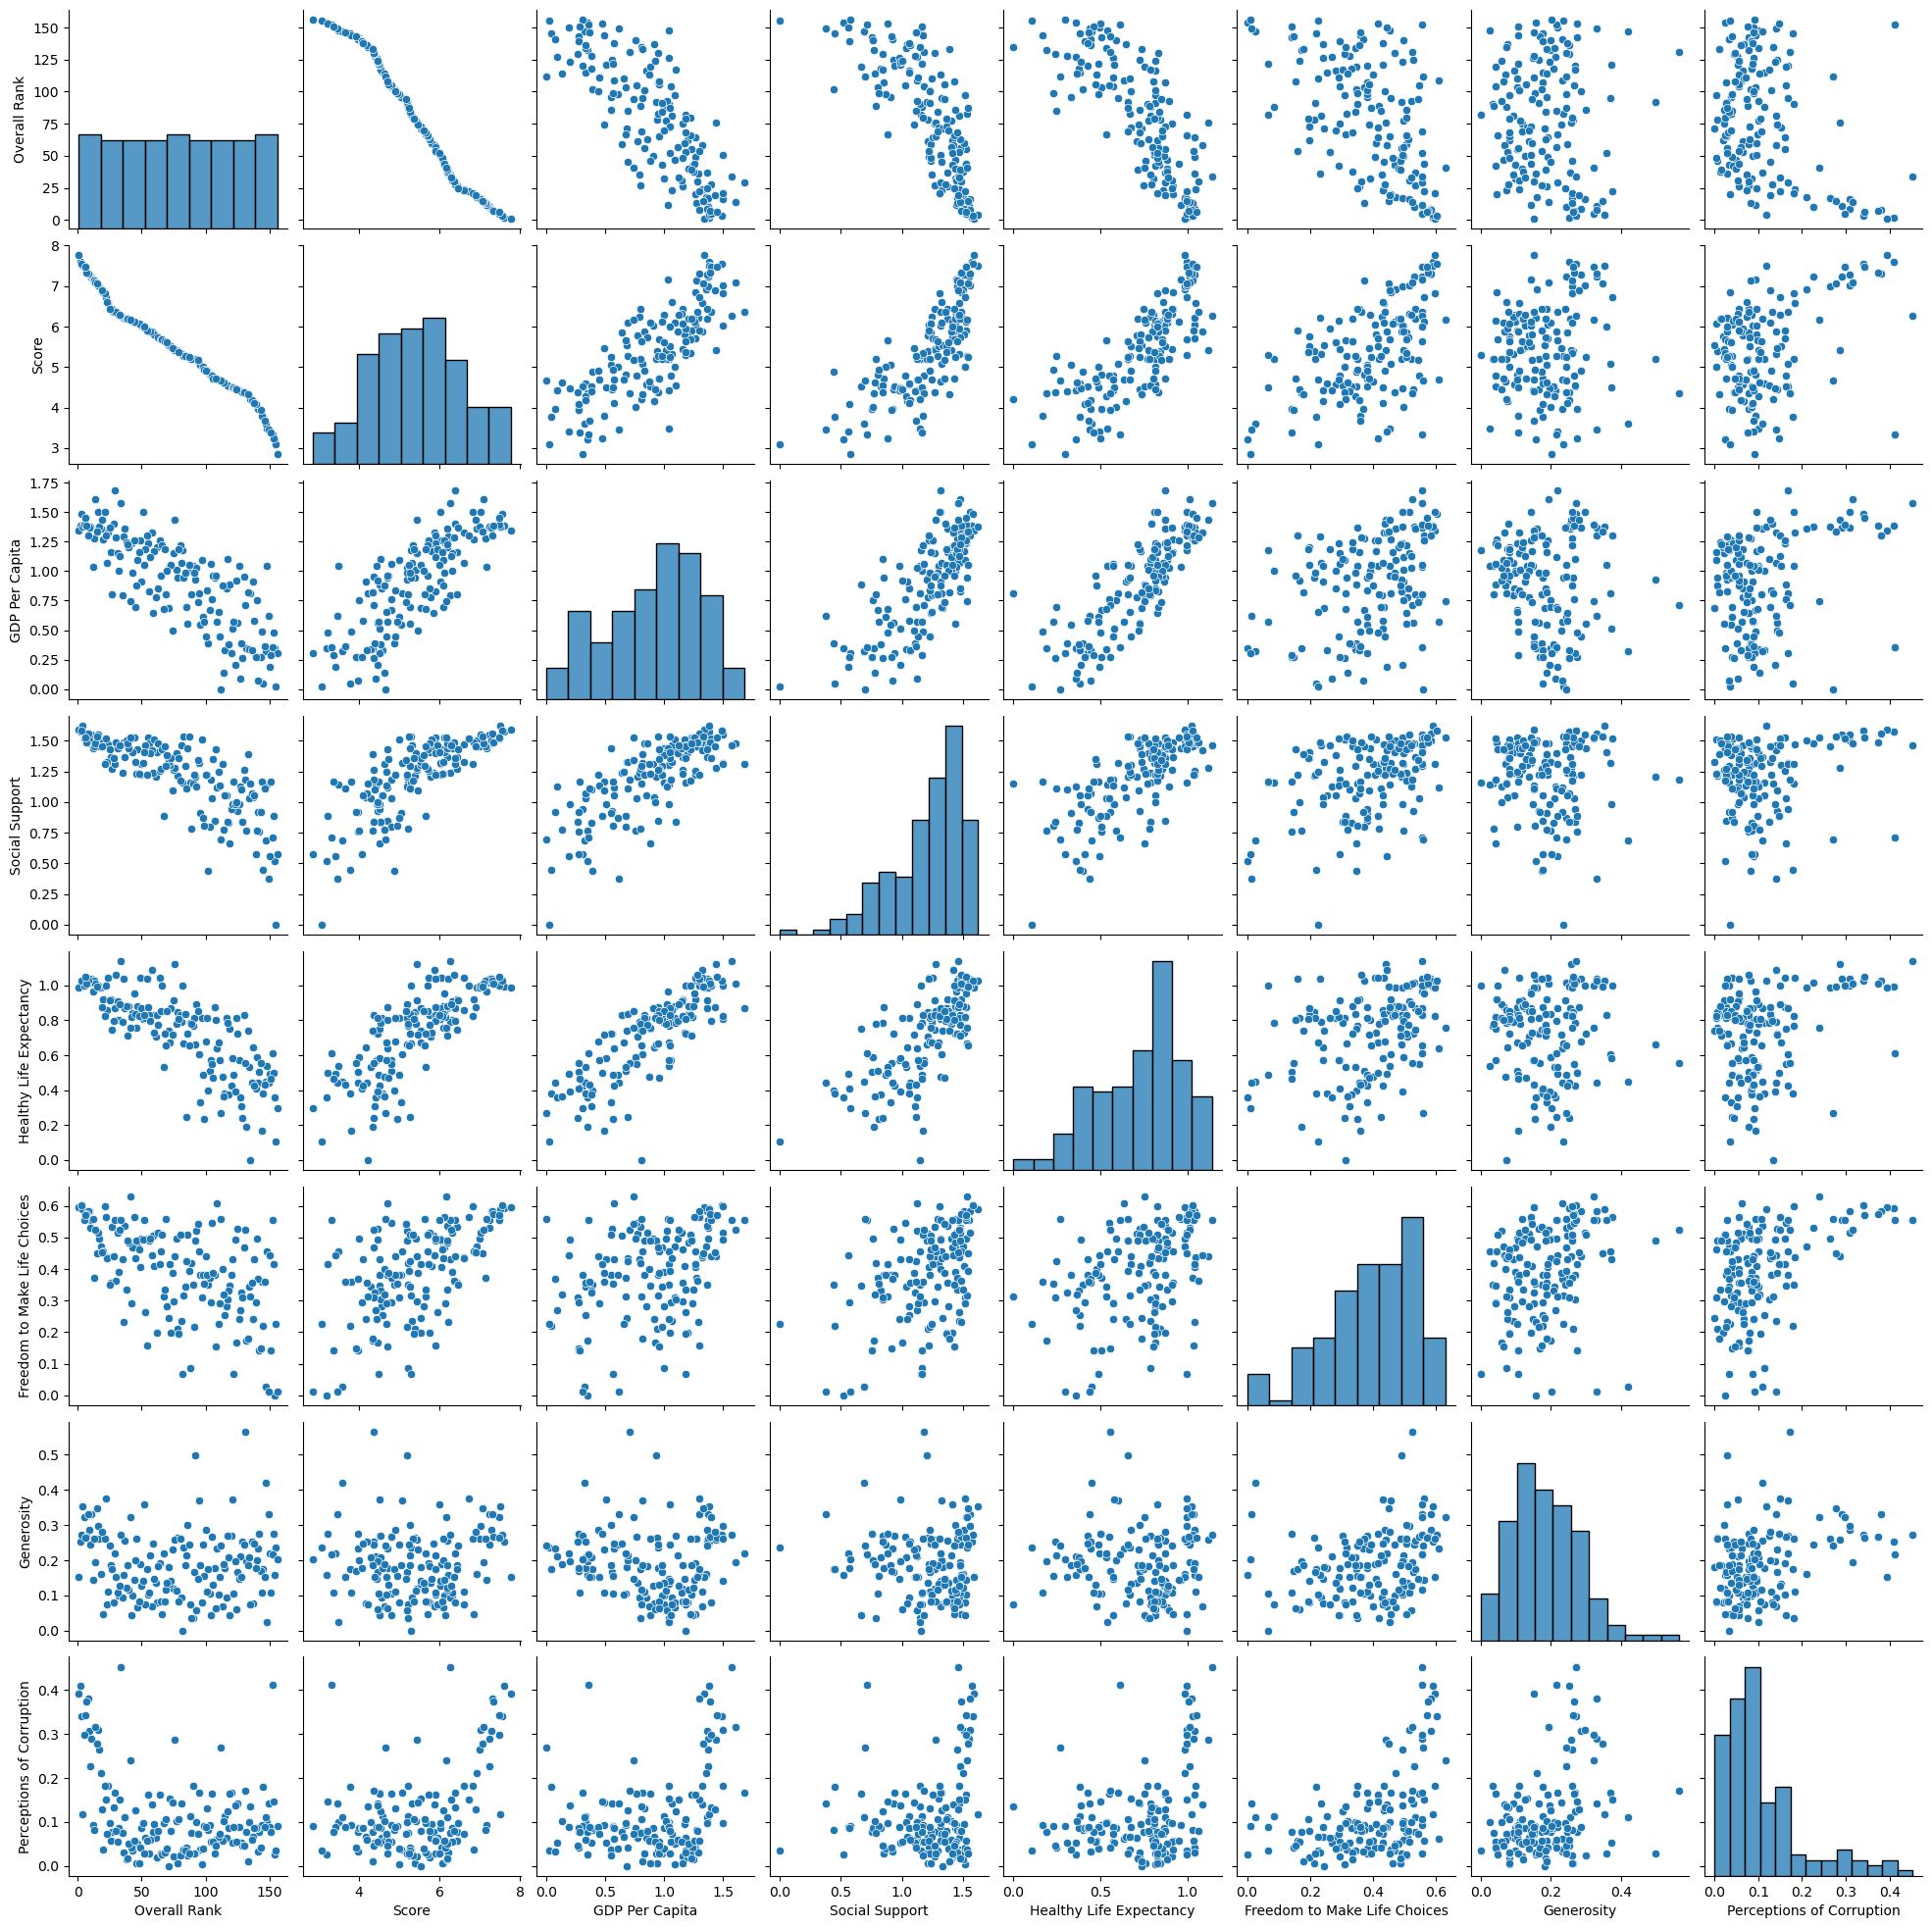

In [45]:
# Make a pair plot using defined columns
g = sns.pairplot(numeric_columns)

## This pair plot provides a lot of information. As suspected from the heat map, the association between generosity and all the other factors is seemingly weak, and the same goes with the Freedom to Make Life Choices column. The strongest positive associations seem to be with Score, GDP Per Capita, Healthy Life Expectancy, and Social Support. 

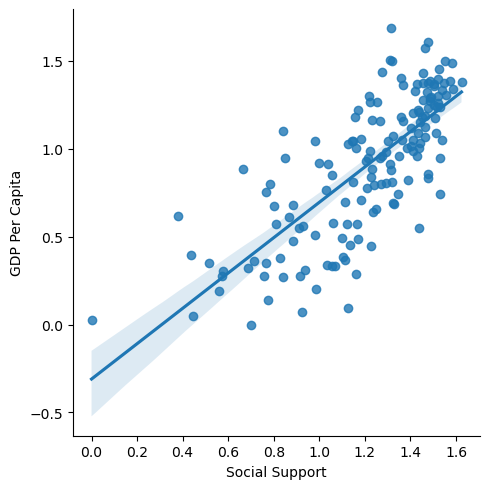

In [49]:
# Explore relationship between GDP Per Capita and Social Support; and GDP Per Capita and Healthy Life Expectancy in seaborn
sns.lmplot(x = 'Social Support', y = 'GDP Per Capita', data = df)


## As GDP goes up, social support appears to increase.

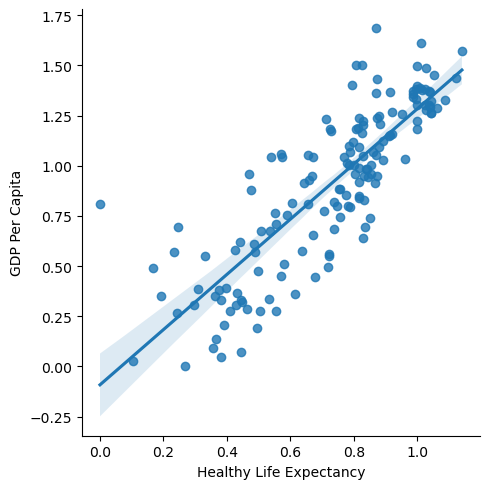

In [51]:
sns.lmplot(x = 'Healthy Life Expectancy', y = 'GDP Per Capita', data = df)

# As GDP per Capita increases, Healthy Life Expectancy too increases. I would like to explore further Healthy Life Expectancy, Score, GDP Per Capita, and Social Support columns because they appear to be the most associated with happiness scores across the countries.

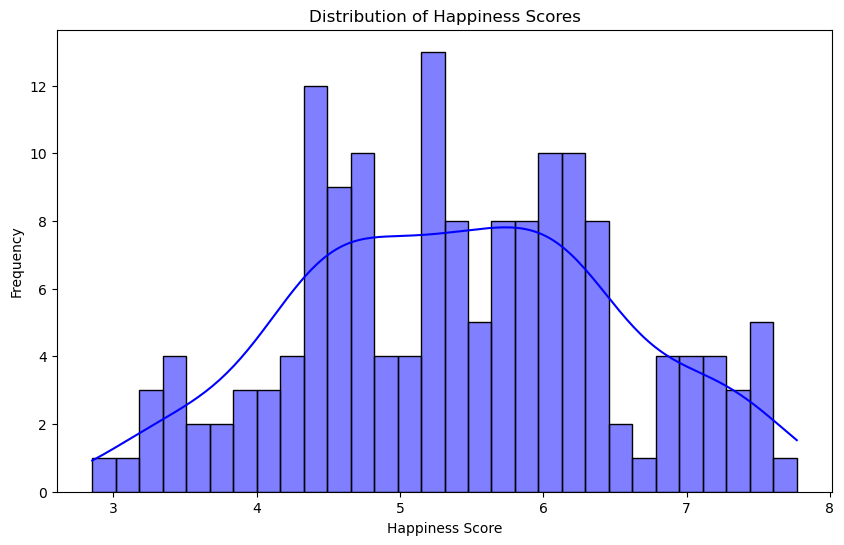

In [59]:
# Creating a categorical variable that splits the Score column into categories
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Score', bins=30, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

In [89]:
df.loc[df['Score'] <= 4, 'Score category'] = 'Low score'
df.loc[(df['Score'] >= 4.1) & (df['Score'] <= 6), 'Score category'] = 'Middle score'
df.loc[(df['Score'] >= 6.1) & (df['Score'] <= 8), 'Score category'] = 'High score'

In [91]:
df['Score'].value_counts(dropna = False)

Score
5.208    2
3.203    1
4.696    1
6.105    1
4.628    1
        ..
3.597    1
5.860    1
5.430    1
5.758    1
3.663    1
Name: count, Length: 155, dtype: int64

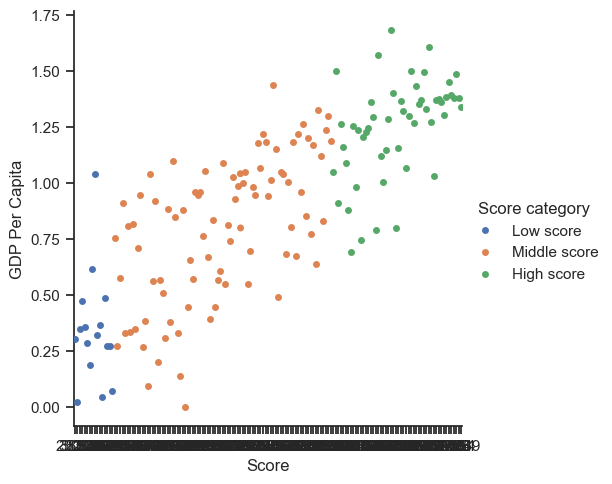

In [93]:
# Create a categorical plot in seaborn using the score categories created above
g = sns.catplot(x= 'Score', y= 'GDP Per Capita', hue= 'Score category', data=df)
sns.set(style='ticks')


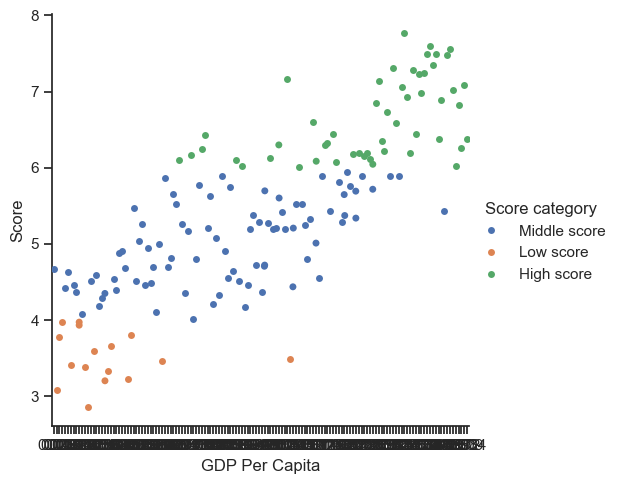

In [95]:
# Create a categorical plot in seaborn using the score categories created above
g = sns.catplot(x= 'GDP Per Capita', y='Score', hue= 'Score category', data=df)
sns.set(style='ticks')

### I alternated the x and y axes with Score and GDP Per Capita columns to see what the visuals would look like. Taking a look at the GDP Per Capita on the y-axis and at 1.0 value, low (0-4), medium (4.1-6), and high (6.1-8) scores are all found on this value. Especially with the medium and high scores, there is some considerable overlap in score and GDP. After a GDP value of 1.50 is when there are only high happines scores.

### Some of the questions I touched on in this exercise include: How do economic factors like GDP correlate with happiness scores across countries? What is the relationship between social support and national happiness levels? What is the relationship between freedom and national happiness levels? How do life expectancy and health care systems impact happiness rankings?

#### It seems that there is a correlation between GDP, Social Support, and Healthy Life Expectancy and Happiness Scores among the countries. Surprisingly, there was a weak correlation between generosity and happiness scores. Happiness scores and freedom to make life choices showed a moderate relationship. It appears then, that GDP has a role in happiness scores but its influence plateaus after a certain point, which leads to the question what other metrics contribute to overall individual happiness and how do these differ depending on region and/or country.

#### Other questions that have arisen during based on early findings during this visual exploration are what is the relationship between social support and generosity? Those seem to be related, however, each has a different relationship with the dependent variable, happiness scores. I am also interested to know what countries that rank at the top have in common in terms of the 6 defined criteria in the dataset, and what those in the middle and who scored lower in ranks have in common.


# Hypothesis 1: GDP Per Capita plays an important role in happiness scores, but its effects diminish after a certain threshold. 
# Hypothesis 2: There are differences in top metrics that predict happiness depending on the region in the world.
# Hypothesis 3: While there are differences in what countries value for well-being, certain criteria remain global, such as social support and healthy life expectancy.